Calculate total variance (without WKB normalization) in SVB.

In [3]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [9]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [19]:
nx = 512
ny = 612
nz = 76
dt = 600

depth_nob = ds2.Depth[:]
depth = ds.Depth[:]
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

Z = ds['Z'][:]
Zl = ds['Zl'][:]

# centers mask
hFacC = ds['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth_nob,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

# no bay
hFacC_nob = ds2['hFacC'][:]

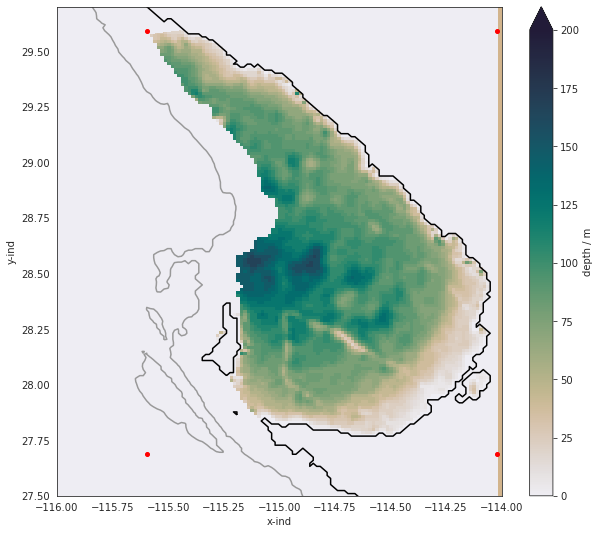

In [49]:
sns.set_style('white')
fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')
cn = ax.contour(lon,lat,depth, colors=['0','0.6'], levels=[0,250])

pc = ax.pcolormesh(LON,LAT,depth.data*(hFacC[0,:,:]-hFacC_nob[0,:,:]),
                   vmin=0, vmax=200, cmap=cmo.cm.rain)
cb = plt.colorbar(pc, extend='max',label='depth / m')

lons_area = [410,511,410,511]
lats_area = [50,190,190,50]

for ii in range(len(lons_area)):
    ax.plot(lon[lons_area[ii]],lat[lats_area[ii]],'ro', markersize=4)
     
cb.set_label('depth / m')
ax.set_xlabel('x-ind')
ax.set_ylabel('y-ind')
ax.set_xlim(-116,-114)
ax.set_ylim(27.5,29.7)
ax.set_aspect(1)

The bay cells are selected as the cells that remain from the difference between the bathymetry with bay minus the one without bay (through hFacC).

In [60]:
tini = 0
tend = 144
x1 = lons_area[0]
x2 = lons_area[1]
y1 = lats_area[0]
y2 = lats_area[1]

hfacDiff = (hFacC[:,y1:y2,x1:x2]-hFacC_nob[:,y1:y2,x1:x2]).data
Wacc = np.empty((nz,y2-y1,x2-x1))

for tt in range(tini,tend):
    W = np.ma.masked_array((ds2.variables['WVEL'][tt,:,y1:y2,x1:x2])*hfacDiff, mask=mask[:,y1:y2,x1:x2])
    Wacc = Wacc + W**2    

In [61]:
Var = np.nansum((Wacc*dt))/(time[tend]-time[tini])
Var

1.4381730037877214e-07

In [62]:
tend2 = 288
for tt in range(tend,tend2):
    W = np.ma.masked_array((ds2.variables['WVEL'][tt,:,y1:y2,x1:x2])*hfacDiff, mask=mask[:,y1:y2,x1:x2])
    Wacc = Wacc + W**2    

In [63]:
Var_2d = np.nansum((Wacc*dt))/(time[tend2]-time[tini])
Var_2d

9.471441070858687e-08

In [64]:
tend3 = 144*3
for tt in range(tend2,tend3):
    W = np.ma.masked_array((ds2.variables['WVEL'][tt,:,y1:y2,x1:x2])*hfacDiff, mask=mask[:,y1:y2,x1:x2])
    Wacc = Wacc + W**2    

In [65]:
Var_3d = np.nansum((Wacc*dt))/(time[tend3]-time[tini])
Var_3d

7.131364301470199e-08

In [66]:
tend4 = (144*5)-1
for tt in range(tend3,tend4):
    W = np.ma.masked_array((ds2.variables['WVEL'][tt,:,y1:y2,x1:x2])*hfacDiff, mask=mask[:,y1:y2,x1:x2])
    Wacc = Wacc + W**2    

In [67]:
Var_5d = np.nansum((Wacc*dt))/(time[tend4-1]-time[tini])
Var_5d

4.887564179461609e-08

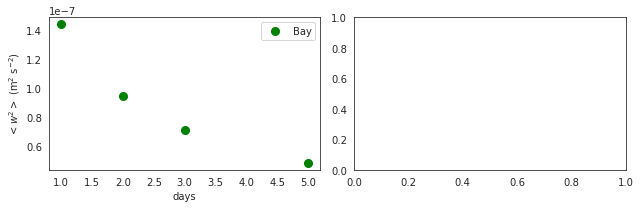

In [68]:
fig, (ax,ax1) = plt.subplots(1,2, figsize=(9,3))
ax.plot([1,2,3,5], [Var, Var_2d, Var_3d, Var_5d],'go',markersize=8, label='Bay')
ax.set_xlabel('days')
ax.set_ylabel('$<w^2>$ (m$^2$ s$^{-2}$)')
ax.legend()

# ax1.plot([1,2,3,5], [perc, perc_2d, perc_3d, perc_5d],'o', color='0.2')
# ax1.set_xlabel('days')
# ax1.set_ylabel(r'($<w_{bay}^2>$-$<w_{noBay}^2>$)/$<w_{noBay}^2>$ %')
# ax1.set_title
plt.tight_layout()